## Import Packages

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
#from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [33]:
# Import dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [34]:
random = np.random.randint(0, x_train.shape[0], 5)
for i in range(random.shape[0]):
    print("Before --> Image ke-{}, max_pixels: {}".format(random[i] ,x_train[random[i]].max()))

# Normalize
x_train = x_train/255.0
x_test = x_test/255.0

# Check the max_pixels
for i in range(random.shape[0]):
    print("After Normalize --> Image ke-{}, max_pixels: {}".format(random[i] ,x_train[random[i]].max()))

Before --> Image ke-4785, max_pixels: 255
Before --> Image ke-48829, max_pixels: 255
Before --> Image ke-8881, max_pixels: 255
Before --> Image ke-32519, max_pixels: 255
Before --> Image ke-51287, max_pixels: 255
After Normalize --> Image ke-4785, max_pixels: 1.0
After Normalize --> Image ke-48829, max_pixels: 1.0
After Normalize --> Image ke-8881, max_pixels: 1.0
After Normalize --> Image ke-32519, max_pixels: 1.0
After Normalize --> Image ke-51287, max_pixels: 1.0


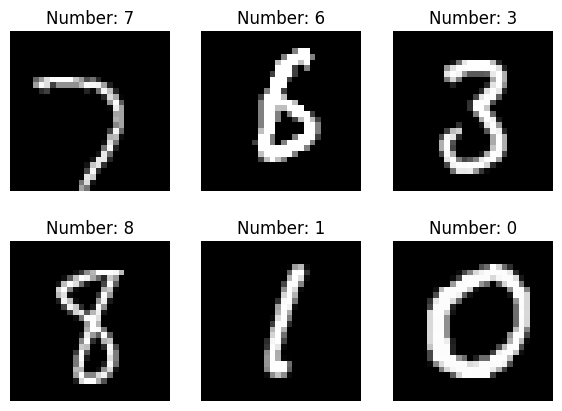

In [35]:
# Menampilkan dataset secara random
random = np.random.randint(0, x_train.shape[0], 6)
plt.figure(figsize=(7, 5))
for i in range(random.shape[0]):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[random[i]], cmap='gray')
    plt.title("Number: {}".format(y_train[random[i]]))
    plt.axis('off')

#plt.show

In [36]:
# Reshape data, 2d --> vektor (28x28 jadi vektor 784 dimensi)
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


## Model SVM

Support Vector Machine adalah algoritma ML yang sering digunakan untuk klasifikasi

In [38]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model
svm_model.fit(x_train_reshaped, y_train)

# Prediksi data uji
y_pred_svm = svm_model.predict(x_test_reshaped)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Akurasi Model SVM: {accuracy_svm * 100:.2f}%')

Akurasi Model SVM: 94.04%


In [39]:
from sklearn.metrics import classification_report
#target_names = ['Apparel', 'Accessories', 'Footwear', 'Personal Care', 'Free Items', 'Sporting Goods']
print('\nclassification report testing : \n', classification_report(y_test, y_pred_svm))


classification report testing : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## Neural Networks

Neural Network sederhana (Multilayer Perceptron) digunakan untuk melatih model klasifikasi citra MNIST

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [44]:
# Model NN Sederhana
model_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Kompilasi model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Latih model
history = model_nn.fit(x_train, y_train,
                       epochs=10,
                       validation_data=(x_test, y_test),
                       batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8771 - loss: 0.4260 - val_accuracy: 0.9635 - val_loss: 0.1192
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9646 - loss: 0.1138 - val_accuracy: 0.9690 - val_loss: 0.1023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9765 - loss: 0.0762 - val_accuracy: 0.9746 - val_loss: 0.0889
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9746 - val_loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9870 - loss: 0.0404 - val_accuracy: 0.9765 - val_loss: 0.0791
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9768 - val_loss: 0.0854
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9754 - val_loss: 0.0942
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0234

In [46]:
# Evaluasi model
test_loss, test_accuracy = model_nn.evaluate(x_test, y_test)
print(f'Akurasi Model Neural Network: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.1104
Akurasi Model Neural Network: 97.86%


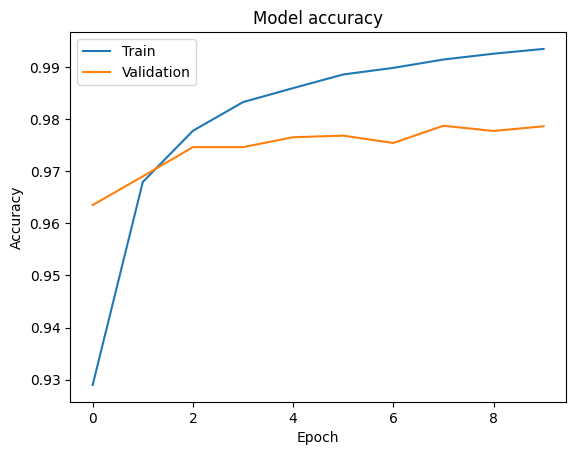

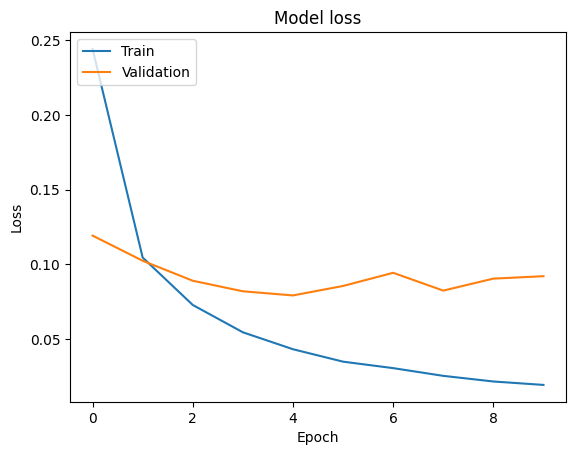

In [47]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()